## 1) Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns
sns.set(color_codes = True)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as statm

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore

## 2) Reading the data as a data frame

In [2]:
vehicle = pd.read_csv("vehicle.csv")
vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
vehicle.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio class  
841             188.0            195   car  
842             186.0            197   van  
843             187.0            201   car  
844             190.0            195   car  
845             186.0            190   van

## 3) Data Analysis and Preparation

### Shape of the data

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder() 
columns = vehicle.columns
#Let's Label Encode our class variable: 
print(columns)
vehicle['class'] = le.fit_transform(vehicle['class'])
vehicle.shape


Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


(846, 19)

In [5]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

### Data type of each attribute

In [6]:
vehicle.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                            int32
dtype: object

### Summary Statistics

In [7]:
vehicle.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

**Observation:**

- Compactness has mean and median values almost similar , it signifies that it is normally distribited and has no skewness/outlier

- circularity : it also seems to be normally distribted as mean amd median has similar values

- scatter_ratio feature seems to be having some kind of skewness and outlier


### Checking missing values (Data Cleaning)

In [8]:
vehicle.isna().apply(pd.value_counts) # checking missing value

compactness  circularity  distance_circularity  radius_ratio  \
False        846.0          841                   842           840   
True           NaN            5                     4             6   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   844                    846.0            845   
True                      2                      NaN              1   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            845                     843                      846.0   
True               1                       3                        NaN   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              843                844                        844   
True                 3                  2                          2   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          842             840               845   
True                             4               6                 1   

       skewness_about.2  hollows_ratio  class  
False               845          846.0  846.0  
True                  1            NaN    NaN

- As we can see most of the columns has missing values.

In [9]:
from sklearn.impute import SimpleImputer
newdf = vehicle.copy()

X = newdf.iloc[:,0:19] #separting all numercial independent attribute

#imputer = SimpleImputer()
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns = column )
newdf.describe().T

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

In [10]:
print("Original null value count:", vehicle.isnull().sum())
print("\n\nCount after we impiuted the NaN value: ", newdf.isnull().sum())

Original null value count: compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


Count after we impiuted the NaN value:  compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity     

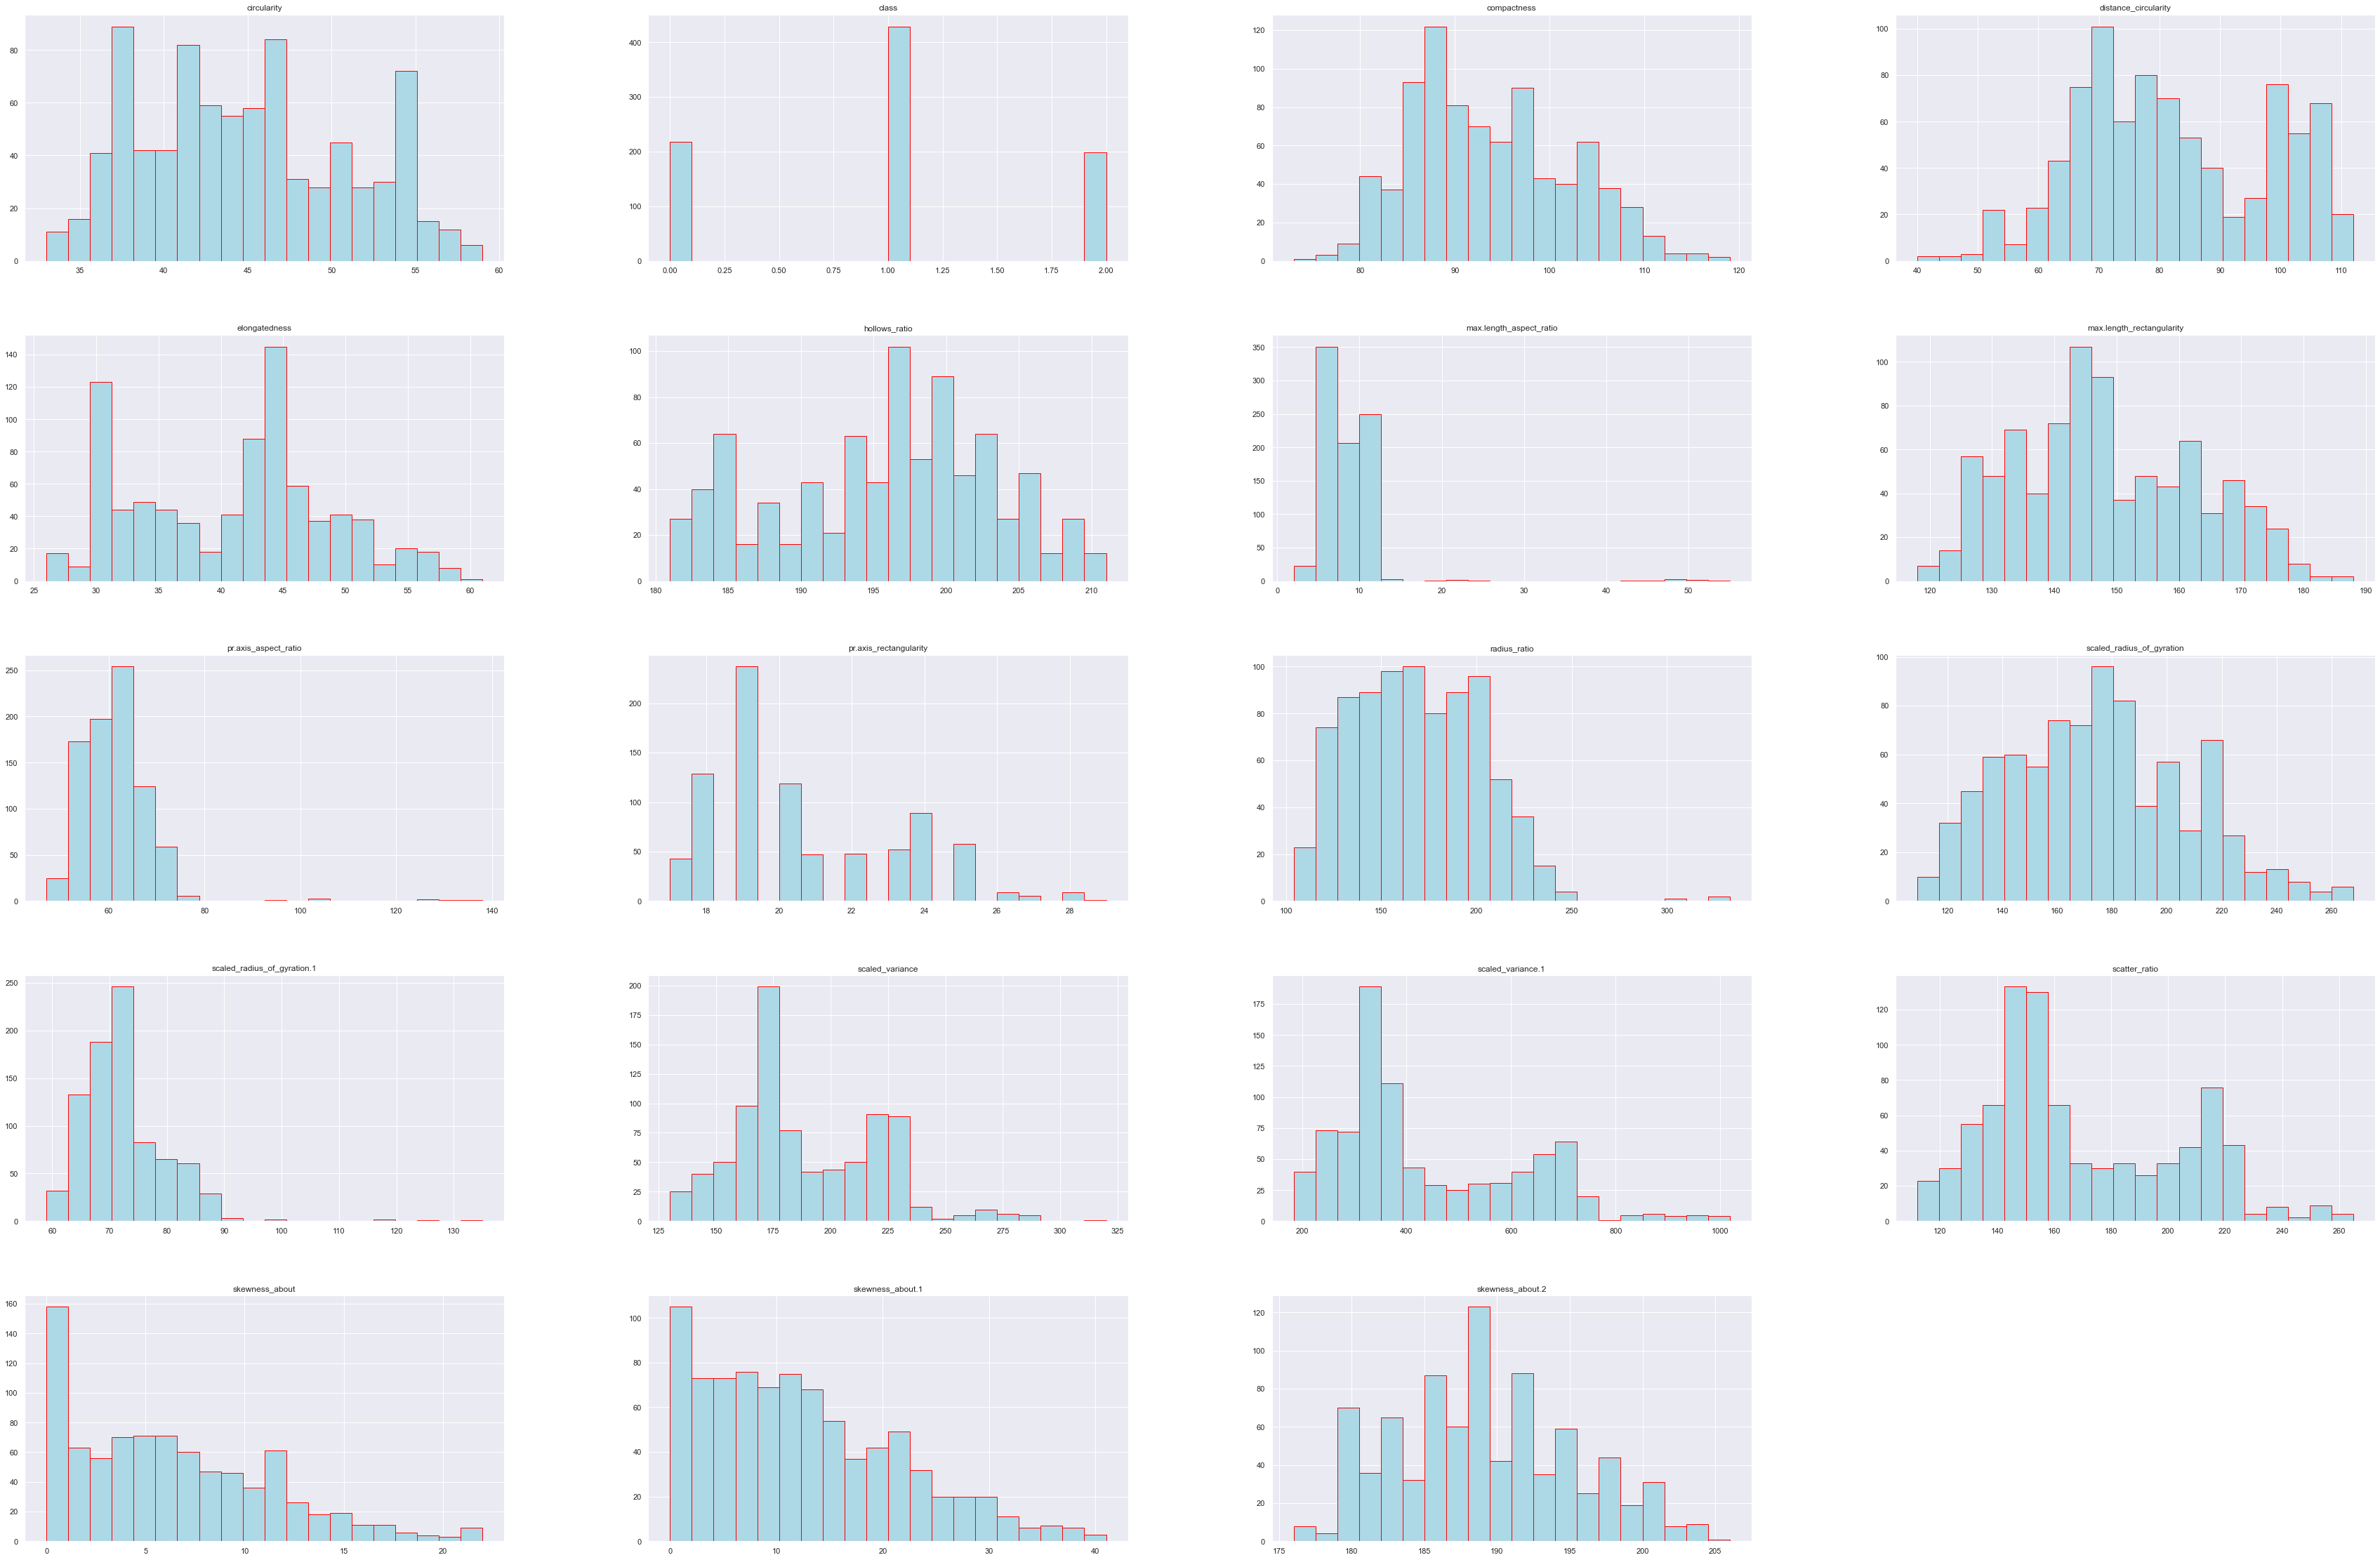

In [11]:
newdf.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'red')
plt.show()

**Observations :**

- Most of the data attributes seems to be normally distributed

- scaled valriance 1 and skewness about 1 and 2, scatter_ratio, seems to be right skewed.

- pr.axis_rectangularity seems to be haing outliers as there are some gaps found in the bar plot.

### Measuring skewness

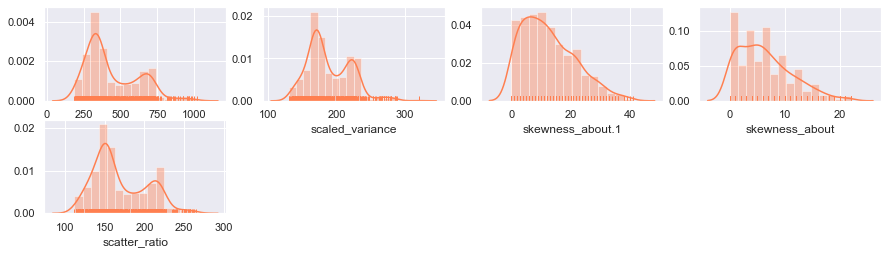

In [12]:
plt.figure(figsize = (15,10))

plt.subplot(5,4,1)
sns.distplot(newdf['scaled_variance.1'], kde = True, rug = True, color = "coral")

plt.subplot(5,4,2)
sns.distplot(newdf['scaled_variance'], kde = True, rug = True, color = "coral")

plt.subplot(5,4,3)
sns.distplot(newdf['skewness_about.1'], kde = True, rug = True, color = "coral")

plt.subplot(5,4,4)
sns.distplot(newdf['skewness_about'], kde = True, rug = True, color = "coral")

plt.subplot(5,4,5)
sns.distplot(newdf['scatter_ratio'], kde = True, rug = True, color = "coral")


plt.show()

In [13]:
newdf.skew(axis = 0, skipna = True)

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64

### Visualizing outliers using boxplots

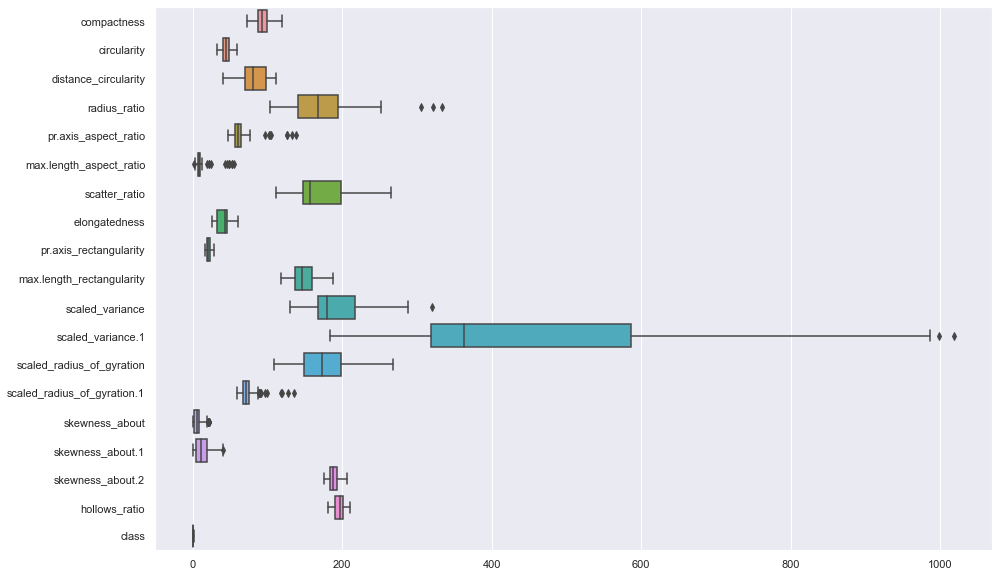

In [14]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(data=newdf, orient="h")

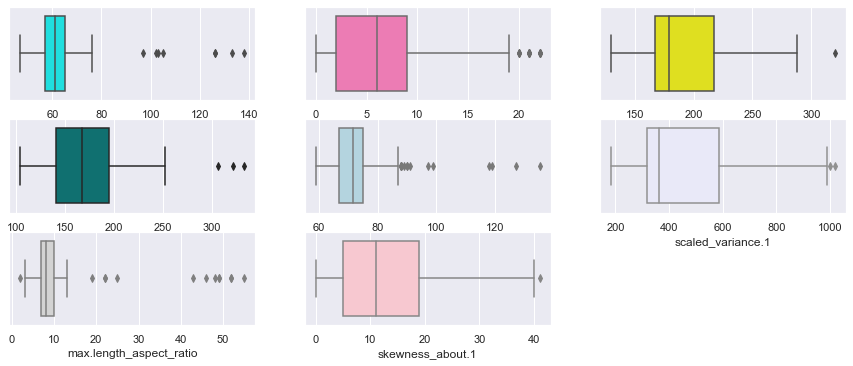

In [15]:
plt.figure(figsize= (15,10))
plt.subplot(5,3,1)
sns.boxplot(x= newdf['pr.axis_aspect_ratio'], color='cyan')

plt.subplot(5,3,2)
sns.boxplot(x= newdf.skewness_about, color='hotpink')

plt.subplot(5,3,3)
sns.boxplot(x= newdf.scaled_variance, color='yellow')

plt.subplot(5,3,4)
sns.boxplot(x= newdf['radius_ratio'], color='teal')

plt.subplot(5,3,5)
sns.boxplot(x= newdf['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(5,3,6)
sns.boxplot(x= newdf['scaled_variance.1'], color='lavender')

plt.subplot(5,3,7)
sns.boxplot(x= newdf['max.length_aspect_ratio'], color='lightgrey')

plt.subplot(5,3,8)
sns.boxplot(x= newdf['skewness_about.1'], color='pink')

plt.show()

All of the above boxplots shows outliers, which is visible with all dotted points.

### Treating Outliers Using IQR: Upper whisker

In [16]:
from scipy.stats import iqr

Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [17]:
cleandf = newdf[~((newdf < (Q1 - 1.5 * IQR)) |(newdf > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape


(813, 19)

### Let's plot the box plot once again to see if outliers are removed

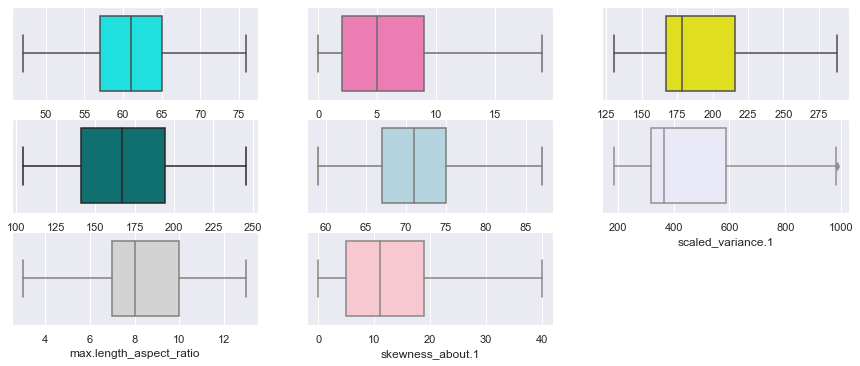

In [18]:
plt.figure(figsize= (15,10))
plt.subplot(5,3,1)
sns.boxplot(x= cleandf['pr.axis_aspect_ratio'], color='cyan')

plt.subplot(5,3,2)
sns.boxplot(x= cleandf.skewness_about, color='hotpink')

plt.subplot(5,3,3)
sns.boxplot(x= cleandf.scaled_variance, color='yellow')

plt.subplot(5,3,4)
sns.boxplot(x= cleandf['radius_ratio'], color='teal')

plt.subplot(5,3,5)
sns.boxplot(x= cleandf['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(5,3,6)
sns.boxplot(x= cleandf['scaled_variance.1'], color='lavender')

plt.subplot(5,3,7)
sns.boxplot(x= cleandf['max.length_aspect_ratio'], color='lightgrey')

plt.subplot(5,3,8)
sns.boxplot(x= cleandf['skewness_about.1'], color='pink')

plt.show()

**We can see that all out boxplot for all the attributes which had outlier have been treate and removed. Since no. of outliers were less we opted to remove it. Generally we avoid this as it can lead to info loss in case of large data sets with large no of outliers**

# 4) Understanding the relationship between all independent attribute:

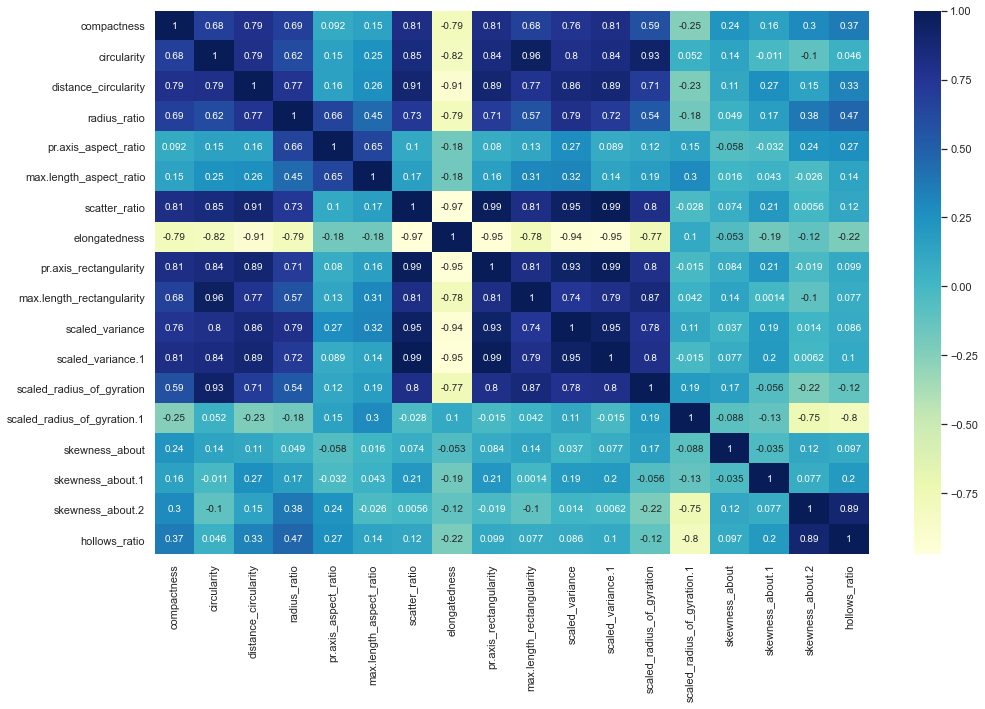

In [19]:
#Let's Drop Class column and see the correlation Matrix & Pairplot Before using this dataframe for PCA 
#as PCA should only be perfromed on independent attribute

corr_df = newdf.drop('class', axis=1)

corr = corr_df.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap = "YlGnBu")
plt.show()

### Observations:
**Strong Correlation:**

- Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.98

- skewness_about_2 and hollow_ratio seems to be strongly correlated, corr coeff: 0.89

- ditance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.81

- compactness & circularity , radius_ratio & pr.axis_aspect_ratio also seems ver averagely correlated with coeff: 0.67.

- scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated with corr coeff: 0.79

- pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with coeff: 0.81 

- scatter_ratio and elongatedness seems to be have strong negative correlation val : 0.97

- elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  0.95

**Weak/No Correlation:**  

- max_length_aspect_ratio & radius_ratio have average correlation with coeff: 0.5

- pr.axis_aspect_ratio & max_length_aspect_ratio seems to have very little correlation
      
- scaled_radius_gyration & scaled_radisu_gyration.1 seems to be very little correlated
      
- scaled_radius_gyration.1 & skewness_about seems to be very little correlated
      
- skewness_about & skewness_about.1 not be correlated
      
- skewness_about.1 and skewness_about.2 are not correlated.

## Pairplot 

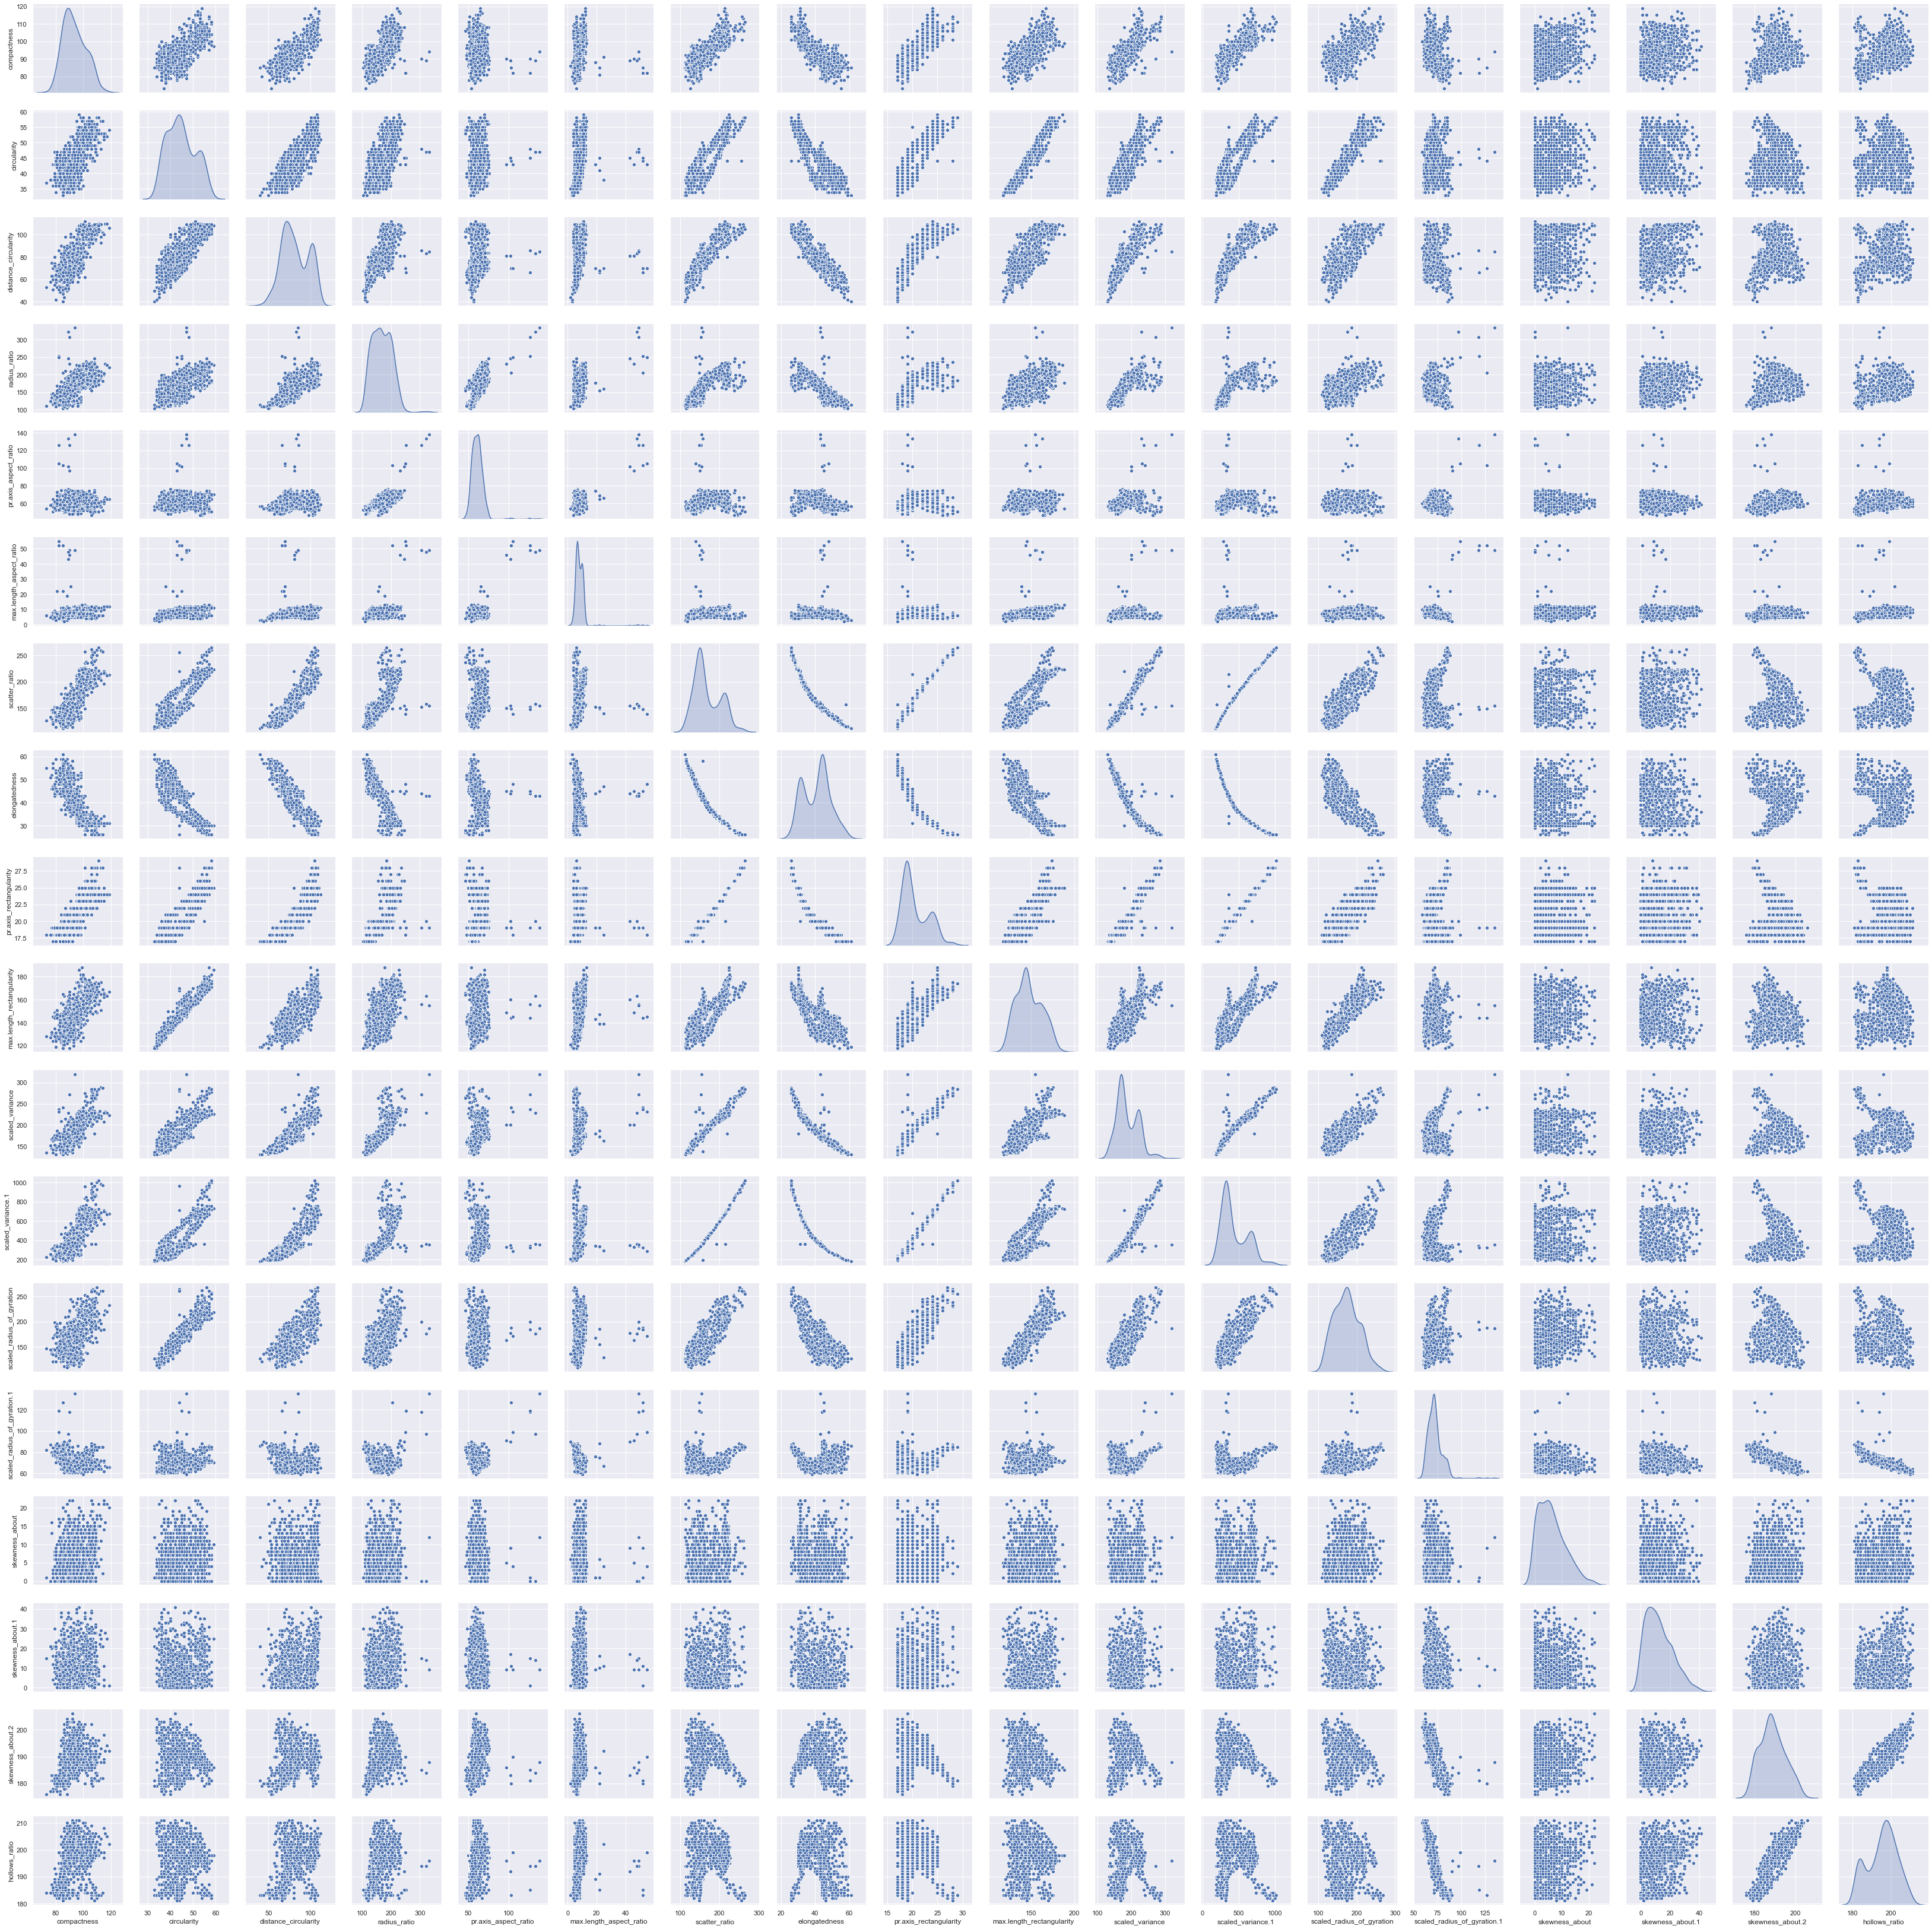

In [20]:
sns.pairplot(corr_df, diag_kind="kde")

**We found from our pairplot analysis that, Scaled Variance & Scaled Variance.1 and elongatedness and pr.axis_rectangularity are strongly correlated. They need to be treated carefully before we go for model building.**

### Choosing the right attributes for model building

Our aim is to reocgnize whether an object is a van or bus or car based on some input features. So our main assumption is there is little or no multicollinearity between the features. If two features are highly correlated then there is no point using both features.

From above correlation matrix we can see that many features are there which having more than 0.9 correlation. 
We can get rid of those columns with correlation +-0.9 or above.
There are 8 such columns:

- max.length_rectangularity
- scaled_radius_of_gyration
- skewness_about.2
- scatter_ratio
- elongatedness
- pr.axis_rectangularity
- scaled_variance
- scaled_variance.1

We can pick one of the two highly correalated variables and drop another one. For example, Scaled Variance & Scaled Variance.1 are having strong positive correlation, so we can pick one and drop one as they will only make our dimension redundant.

Similarly between elongatedness and pr.axis_rectangularity we can pick one as they have very strong negative correlation.

# 5) Distribution of target column 

1.0    416
0.0    208
2.0    189
Name: class, dtype: int64


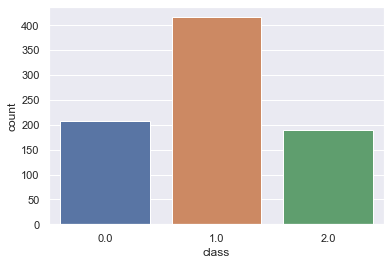

In [21]:
#display how many are car,bus,van. 
print(cleandf['class'].value_counts())

sns.countplot(cleandf['class'])
plt.show()

# 6) Principal Component Analysis(PCA):

In [22]:
# we separate the target variable (class) and save it in the y variable. Also the X contains the independant variables.
X = cleandf.iloc[:,0:18].values
y = cleandf.iloc[:,18].values

In [23]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
XScaled = StandardScaler().fit_transform(X)

In [24]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(XScaled.T) # the relevanat covariance matrix
print("Covariance Matrix shape:",cov_matrix.shape)
print("Covariance Matrix\n", cov_matrix)

Covariance Matrix shape: (18, 18)
Covariance Matrix
 [[ 1.00123153e+00  6.80164027e-01  7.87792814e-01  7.46906930e-01
   2.00881439e-01  4.98273207e-01  8.11840645e-01 -7.89531434e-01
   8.12866245e-01  6.74996601e-01  7.92438680e-01  8.13494150e-01
   5.78399755e-01 -2.53990635e-01  2.00887113e-01  1.61304844e-01
   2.95777412e-01  3.64608943e-01]
 [ 6.80164027e-01  1.00123153e+00  7.87747162e-01  6.41725205e-01
   2.06409699e-01  5.64854067e-01  8.44804611e-01 -8.16768295e-01
   8.41196310e-01  9.62404205e-01  8.03750964e-01  8.33508154e-01
   9.26281607e-01  6.67790806e-02  1.40563881e-01 -1.43598307e-02
  -1.16976151e-01  3.92302597e-02]
 [ 7.87792814e-01  7.87747162e-01  1.00123153e+00  8.09326627e-01
   2.45756551e-01  6.69657073e-01  9.06692225e-01 -9.09806087e-01
   8.95884623e-01  7.69635504e-01  8.85221631e-01  8.89286924e-01
   7.03348558e-01 -2.38231284e-01  9.89345733e-02  2.63832735e-01
   1.29070982e-01  3.22051625e-01]
 [ 7.46906930e-01  6.41725205e-01  8.09326627e-01 

In [25]:
#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-2.72251046e-01 -8.97284818e-02  2.26045073e-02  1.30419032e-01
  -1.52324139e-01  2.58374578e-01 -1.88794221e-01 -7.71578238e-01
  -3.61784776e-01 -1.25233628e-01  2.92009470e-02  7.62442008e-04
  -1.06680587e-02  1.05983722e-02 -1.01407495e-01 -1.46326861e-01
  -3.81638532e-03  3.32992130e-03]
 [-2.85370045e-01  1.33173937e-01  2.10809943e-01 -2.06785531e-02
   1.39022591e-01 -6.88979940e-02  3.90871235e-01 -6.60528436e-02
  -4.62957583e-02  2.40262612e-01  7.29503235e-02  1.93799916e-01
  -7.74670931e-03 -8.71766559e-02 -3.11337823e-01  1.96463651e-01
  -2.96230720e-01  5.83996136e-01]
 [-3.01486231e-01 -4.40259591e-02 -7.08780817e-02  1.07425217e-01
   8.07335409e-02 -2.04800896e-02 -1.76384547e-01  2.98693883e-01
  -2.64499195e-01 -9.42971834e-02  7.78755026e-01 -2.32649049e-01
   1.11905744e-02  2.28724292e-02  5.89166755e-02  5.33931974e-02
   9.72735293e-02  8.64160083e-02]
 [-2.72594510e-01 -2.04232234e-01 -4.02139629e-02 -2.52957341e-01
  -1.19012554e-01 -1.39

In [26]:
eigen_pairs = [(np.abs(e_vals[index]), e_vecs[:,index]) for index in range(len(e_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eigen_pairs.sort(reverse=True)
eigen_pairs[:18]

[(9.792975698382953,
  array([-0.27225105, -0.28537005, -0.30148623, -0.27259451, -0.09857976,
         -0.19475579, -0.31051844,  0.30843834, -0.30754849, -0.27630107,
         -0.30274811, -0.30704063, -0.26152049,  0.04363236, -0.0367057 ,
         -0.05885041, -0.03483739, -0.08281362])),
 (3.377106439893973,
  array([-0.08972848,  0.13317394, -0.04402596, -0.20423223, -0.25913686,
         -0.09457563,  0.07233508, -0.01168768,  0.08409153,  0.12583663,
          0.07019986,  0.07793366,  0.20992728,  0.50391445, -0.01456825,
         -0.09339805, -0.50166421, -0.50654656])),
 (1.2087305396351002,
  array([ 0.02260451,  0.21080994, -0.07087808, -0.04021396,  0.11480523,
          0.13931348, -0.1129247 ,  0.09003305, -0.11106355,  0.21987769,
         -0.14481876, -0.11532395,  0.21362744, -0.06739209,  0.52162344,
         -0.68717064,  0.06220695,  0.04080354])),
 (1.136595602176694,
  array([ 0.13041903, -0.02067855,  0.10742522, -0.25295734, -0.605228  ,
          0.32253141, 

In [27]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eigen_pairs[index][0] for index in range(len(e_vals))]
eigvectors_sorted = [eigen_pairs[index][1] for index in range(len(e_vals))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[9.792975698382953, 3.377106439893973, 1.2087305396351002, 1.136595602176694, 0.8962868592787947, 0.6582931281646512, 0.3230565251079227, 0.2269066128235807, 0.11274168632338624, 0.0762069059326686, 0.061839309866481375, 0.04424209694975977, 0.02999191420611325, 0.026773513807314915, 0.01945374459814113, 0.017719193496813643, 0.010121609778869617, 0.0031261072615284837]


In [28]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.33850121  73.07712653  79.78403645  86.09068965  91.0639364
  94.71662207  96.50917296  97.76821471  98.39378701  98.81663795
  99.1597671   99.40525421  99.571671    99.72022979  99.82817322
  99.9264921   99.9826541  100.        ]


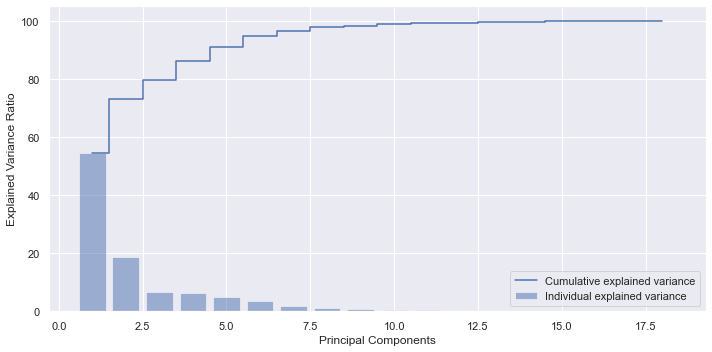

In [29]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

**From above plot we can see that 8 dimensions are able to explain 95 %variance of data. So we will use first 8 principal components going forward and calulate the reduced dimensions.**

### Dimensionality Reduction

Now 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data.

In [30]:
#dim_reduce represents reduced mathematical space.

dim_reduce = np.array(eigvectors_sorted[0:8])   #Reducing from 8 to 4 dimension space

XScaled_pca = np.dot(XScaled,dim_reduce.T)   #projecting original data into principal component dimensions

dim_reduce = pd.DataFrame(XScaled_pca)  #converting array to dataframe for pairplot

dim_reduce

0         1         2         3         4         5         6  \
0   -0.591125 -0.655523  0.564477 -0.659870  0.855251 -1.835814  0.155983   
1    1.524878 -0.327117  0.251528  1.296236  0.282463 -0.091649 -0.209862   
2   -3.969982  0.239514  1.229875  0.180391 -0.919360 -0.650638 -0.826445   
3    1.549729 -3.037566  0.466449  0.394413  0.623392  0.383794 -0.131539   
4   -5.468963  4.651385 -1.290061  0.023804 -1.692033  2.510965 -0.315330   
..        ...       ...       ...       ...       ...       ...       ...   
808  0.368201 -0.641878 -1.481101  0.164090 -0.777381 -0.934650 -0.874360   
809  0.040917 -0.160848 -0.473839 -0.179208  1.978454 -1.431609  0.279248   
810 -5.188919 -0.171319  0.585738 -0.886837  1.348744  0.225891 -0.888525   
811  3.321748 -1.094132 -1.930953  0.339361  0.527587 -0.030116  0.265542   
812  5.012853  0.432697 -1.315713  0.196398  0.167606  0.345863  0.409124   

            7  
0   -0.683144  
1    0.127745  
2    0.163185  
3   -0.176248  
4    0.475009  
..        ...  
808  0.193428  
809 -0.302916  
810 -0.429704  
811  0.451123  
812 -0.221262  

[813 rows x 8 columns]

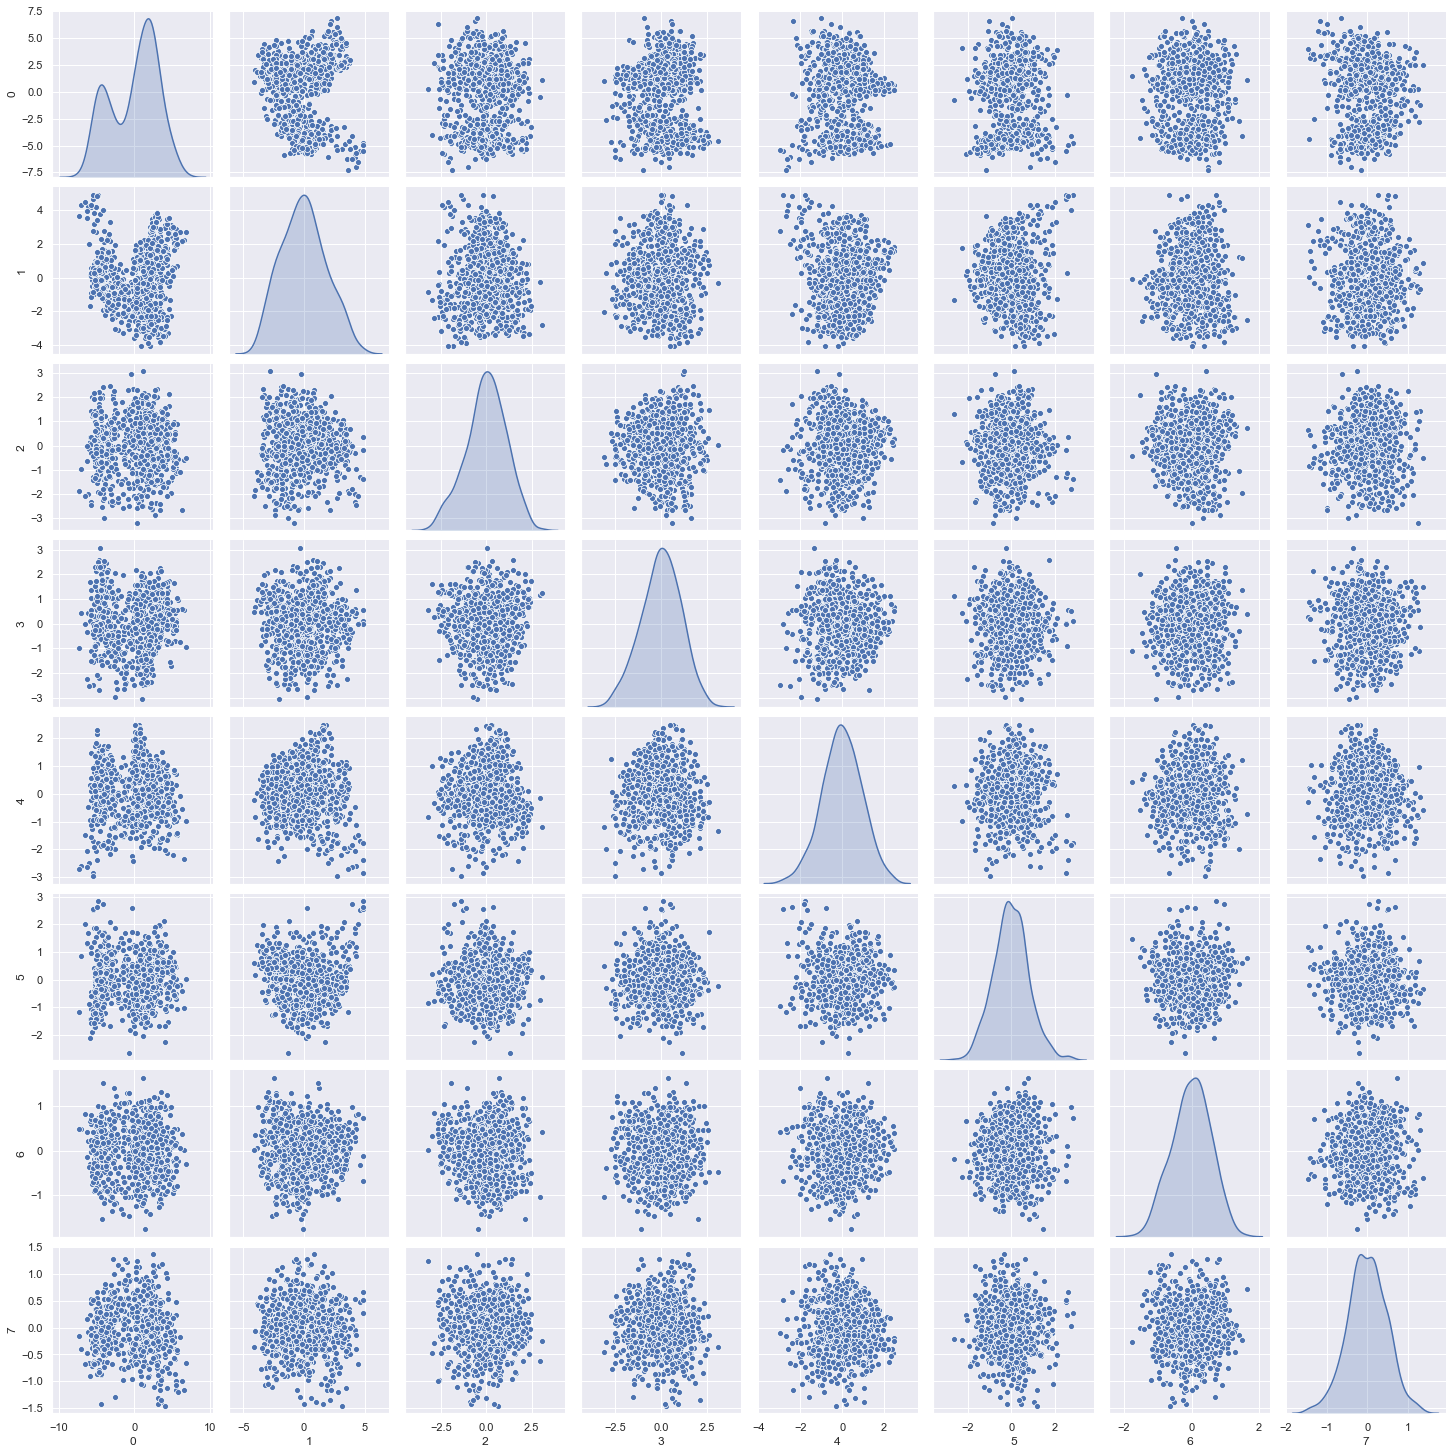

In [31]:
sns.pairplot(dim_reduce, diag_kind='kde') 

**It is clealry visible from the pairplot above that after dimensionality reduction using PCA, attributes have become independent with no correlation among themselves. As most of them have cloud of data points with no linear kind of relationship.**

## 7) Spliting the data
**We will use 70% of data for training and 30% for testing.**


In [32]:
from sklearn.model_selection import train_test_split

#orginal Data
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.30, random_state = 1)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(dim_reduce, y, test_size=0.30, random_state = 1)

## Let's train the model with original data and pca data with new dimensions

In [33]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

#predict the y value
y_pred = clf.predict(X_test)

print ('Before PCA score', clf.score(X_test, y_test))

Before PCA score 0.9795081967213115


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        78
         1.0       0.98      0.98      0.98       121
         2.0       0.98      0.93      0.95        45

    accuracy                           0.98       244
   macro avg       0.98      0.97      0.98       244
weighted avg       0.98      0.98      0.98       244



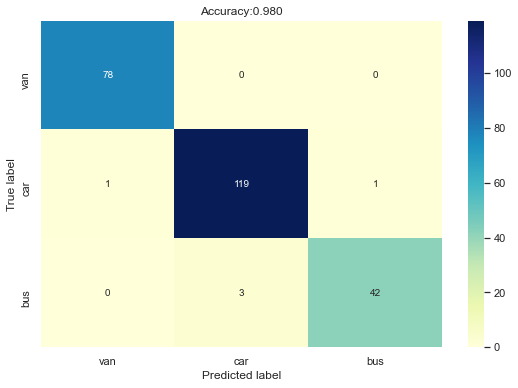

In [34]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Classification Report
print(classification_report(y_test, y_pred)) 

# Creates a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
df_cm = pd.DataFrame(cm,
                     index = ['van','car','bus'], 
                     columns = ['van','car','bus'])

plt.figure(figsize=(9,6))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


**An insight we can get from the matrix is that the SVC model was very weak at classifying 'van' (True Positive/All = 0.10), However, accuracy for 'car'(93/121= 0.77) and 'bus'(39/45= 0.87) was slightly better.**


### After PCA score

In [35]:
clf.fit(pca_X_train, pca_y_train)

#predict the y value
pca_y_pred = clf.predict(pca_X_test)

print ('After PCA score', clf.score(pca_X_test, pca_y_test))


After PCA score 0.9631147540983607


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        78
         1.0       0.97      0.96      0.96       121
         2.0       0.98      0.91      0.94        45

    accuracy                           0.96       244
   macro avg       0.96      0.96      0.96       244
weighted avg       0.96      0.96      0.96       244



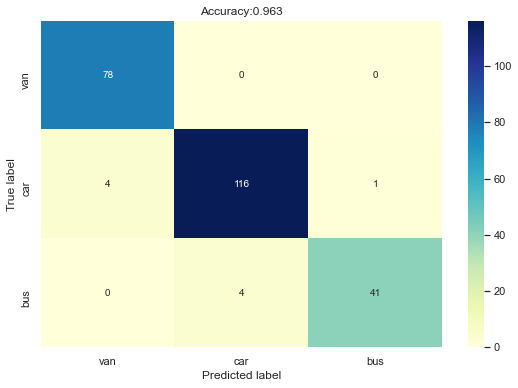

In [36]:
# Classification Report
print(classification_report(pca_y_test, pca_y_pred)) 

# Creates a confusion matrix
cm = metrics.confusion_matrix(pca_y_test, pca_y_pred) 

# Transform to df for easier plotting
df_cm = pd.DataFrame(cm,
                     index = ['van','car','bus'], 
                     columns = ['van','car','bus'])

plt.figure(figsize=(9,6))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(pca_y_test, pca_y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**An insight we can get from the matrix is that the SVC model after PCA was very accurate at classifying 'van' (True Positive/All = 1.0). However, accuracy for 'car' (116/121= 0.96) and 'bus' (41/45= 0.91) was lower.**

# 8) Comparing the scores

**In the given dataset we trained models with the orginal and dimensionally reduced datasets.**

**- For SVM model , We got 98%  accuracy with original data.** 

**- With PCA, we got 96% accuracy. The effects of PCA can be clearly appreciated on a datsaset.**

*Dimensionality Reduction plays a really important role in machine learning, especially when you are working with more number of features. Principal Components Analysis are one of the top dimensionality reduction algorithm and easy to understand.*

**The original dataset was composed of 18 features x 846 rows. After applying a Principal Components Analysis, I discovered that only 8 principal components were enough to keep 96% accuracy score!**